In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import os
os.getcwd()

'/Users/ivang/PycharmProjects/pythonProject/notebooks/evaluation'

In [21]:
from dotenv import load_dotenv

load_dotenv()

project_root = os.getenv('PROJECT_ROOT')
print(project_root)
os.chdir(project_root)

/Users/ivang/PycharmProjects/pythonProject/


In [22]:
from src.evaluation.results import Results

In [23]:
path = os.path.join(project_root)
os.chdir(os.path.join(path, "notebooks/evaluation"))
print(os.getcwd())

/Users/ivang/PycharmProjects/pythonProject/notebooks/evaluation


In [24]:
results = Results("./results", combine_models=True); results.get_keys()

{'basic': ['openml', 'all'], 'dtm': []}

In [25]:
df = results.get_data("openml", aggregated=False)
df[:50]

,Dataset,Model,nr_topics,npmi,diversity,params,Dataset_Size,ComputationTime
0,openml,BERTopic_optimized_POS_full_range,10,0.088570,0.750000,"{'nr_topics': 10, 'min_topic_size': 2, 'verbos...",5283,38.786463
1,openml,BERTopic_optimized_POS_full_range,20,0.031737,0.783333,"{'nr_topics': 20, 'min_topic_size': 2, 'verbos...",5283,44.786752
2,openml,BERTopic_optimized_POS_full_range,30,0.009870,0.767857,"{'nr_topics': 30, 'min_topic_size': 2, 'verbos...",5283,49.800758
3,openml,BERTopic_optimized_POS_full_range,40,0.011087,0.789474,"{'nr_topics': 40, 'min_topic_size': 2, 'verbos...",5283,54.987404
4,openml,BERTopic_optimized_POS_full_range,50,0.000836,0.820833,"{'nr_topics': 50, 'min_topic_size': 2, 'verbos...",5283,60.522864
5,openml,BERTopic_optimized_POS_full_range,100,0.001238,0.843750,"{'nr_topics': 100, 'min_topic_size': 2, 'verbo...",5283,33.543523
6,openml,BERTopic_optimized_POS_full_range,200,-0.017422,0.828788,"{'nr_topics': 200, 'min_topic_size': 2, 'verbo...",5283,34.384225
7,openml,NMF,10,0.071501,0.580000,"{'num_topics': 10, 'random_state': 21}",5283,15.453815
8,openml,NMF,20,0.081873,0.495000,"{'num_topics': 20, 'random_state': 21}",5283,27.449619
9,openml,NMF,30,0.081851,0.376667,"{'num_topics': 30, 'random_state': 21}",5283,25.039816


In [26]:
for nr_topics in df['nr_topics'].unique():
    subset = df[df['nr_topics'] == nr_topics]
    print(subset)

    Dataset                              Model nr_topics      npmi  diversity  \
0    openml  BERTopic_optimized_POS_full_range        10  0.088570     0.7500   
7    openml                                NMF        10  0.071501     0.5800   
14   openml                                LDA        10  0.018750     0.4000   
21   openml                         CTM_CUSTOM        10 -0.018156     0.9400   
28   openml  BERTopic_optimized_POS_full_range        10  0.091452     0.7875   
..      ...                                ...       ...       ...        ...   
525  openml                                LDA        10  0.014184     0.4400   
532  openml                                NMF        10 -0.014603     0.5500   
539  openml                       BERTopic_POS        10  0.018514     0.7375   
546  openml                                LDA        10  0.020397     0.5300   
553  openml                         CTM_CUSTOM        10  0.055489     0.9900   

                           

In [27]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [28]:
# Levene's test for npmi
levene_test_npmi = stats.levene(
    df[df['nr_topics'] == 10]['npmi'],
    df[df['nr_topics'] == 20]['npmi'],
    df[df['nr_topics'] == 30]['npmi'],
    df[df['nr_topics'] == 40]['npmi'],
    df[df['nr_topics'] == 50]['npmi']
)
print(f"Levene's test for npmi: {levene_test_npmi}")

# Bartlett's test for npmi
bartlett_test_npmi = stats.bartlett(
    df[df['nr_topics'] == 10]['npmi'],
    df[df['nr_topics'] == 20]['npmi'],
    df[df['nr_topics'] == 30]['npmi'],
    df[df['nr_topics'] == 40]['npmi'],
    df[df['nr_topics'] == 50]['npmi']
)
print(f"Bartlett's test for npmi: {bartlett_test_npmi}")

# Levene's test for diversity
levene_test_diversity = stats.levene(
    df[df['nr_topics'] == 10]['diversity'],
    df[df['nr_topics'] == 20]['diversity'],
    df[df['nr_topics'] == 30]['diversity'],
    df[df['nr_topics'] == 40]['diversity'],
    df[df['nr_topics'] == 50]['diversity']
)
print(f"Levene's test for diversity: {levene_test_diversity}")

# Bartlett's test for diversity
bartlett_test_diversity = stats.bartlett(
    df[df['nr_topics'] == 10]['diversity'],
    df[df['nr_topics'] == 20]['diversity'],
    df[df['nr_topics'] == 30]['diversity'],
    df[df['nr_topics'] == 40]['diversity'],
    df[df['nr_topics'] == 50]['diversity']
)
print(f"Bartlett's test for diversity: {bartlett_test_diversity}")

Levene's test for npmi: LeveneResult(statistic=0.24147793094780257, pvalue=0.9147323434908411)
Bartlett's test for npmi: BartlettResult(statistic=0.34763476315425357, pvalue=0.9865352472185372)
Levene's test for diversity: LeveneResult(statistic=3.539746045189829, pvalue=0.007468783469982831)
Bartlett's test for diversity: BartlettResult(statistic=8.23465174068571, pvalue=0.08335106781234222)


Shapiro-Wilk test for npmi: ShapiroResult(statistic=0.9033640875285348, pvalue=2.3923822814021717e-18)


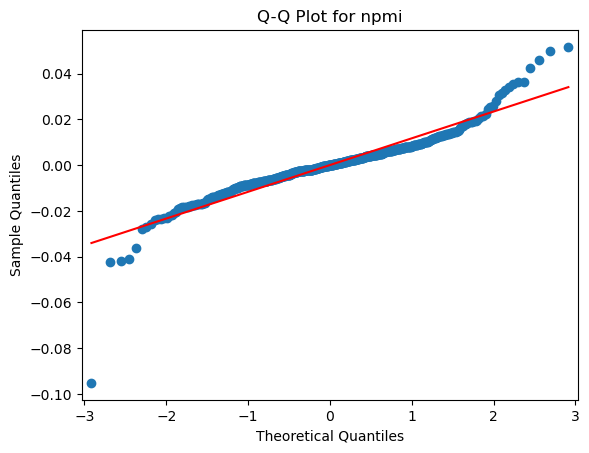

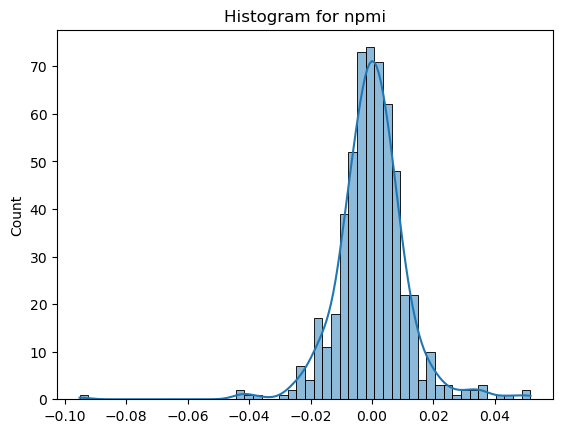

Shapiro-Wilk test for diversity: ShapiroResult(statistic=0.9639621530139253, pvalue=1.7453461358276124e-10)


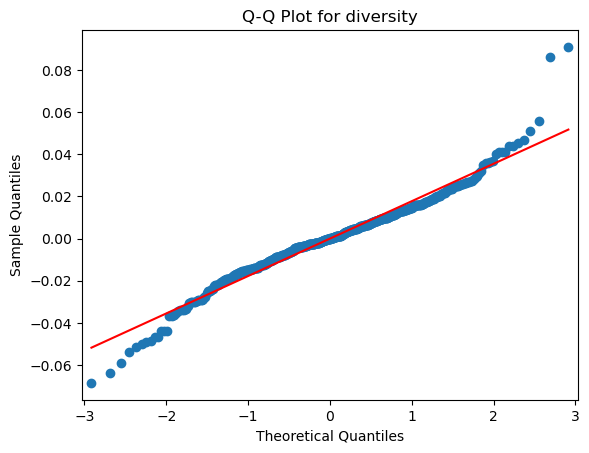

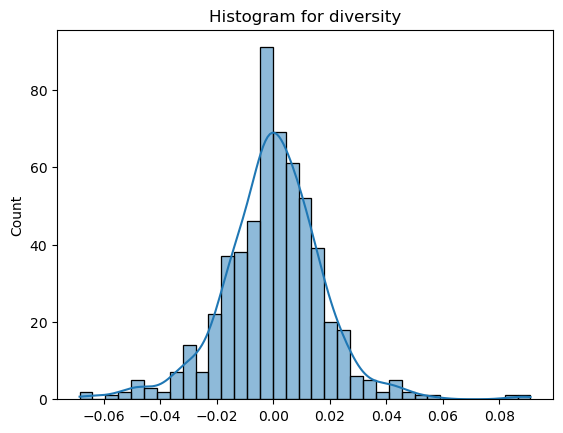

In [29]:
# Model and residuals for npmi
model_npmi = sm.formula.ols('npmi ~ C(Model) * C(nr_topics)', data=df).fit()
residuals_npmi = model_npmi.resid

# Shapiro-Wilk test for npmi
shapiro_test_npmi = stats.shapiro(residuals_npmi)
print(f"Shapiro-Wilk test for npmi: {shapiro_test_npmi}")

# Q-Q plot for npmi
sm.qqplot(residuals_npmi, line='s')
plt.title("Q-Q Plot for npmi")
plt.show()

# Histogram for npmi
sns.histplot(residuals_npmi, kde=True)
plt.title("Histogram for npmi")
plt.show()

# Model and residuals for diversity
model_diversity = sm.formula.ols('diversity ~ C(Model) * C(nr_topics)', data=df).fit()
residuals_diversity = model_diversity.resid

# Shapiro-Wilk test for diversity
shapiro_test_diversity = stats.shapiro(residuals_diversity)
print(f"Shapiro-Wilk test for diversity: {shapiro_test_diversity}")

# Q-Q plot for diversity
sm.qqplot(residuals_diversity, line='s')
plt.title("Q-Q Plot for diversity")
plt.show()

# Histogram for diversity
sns.histplot(residuals_diversity, kde=True)
plt.title("Histogram for diversity")
plt.show()

In [30]:
df[df['nr_topics'] == 10]

,Dataset,Model,nr_topics,npmi,diversity,params,Dataset_Size,ComputationTime
0,openml,BERTopic_optimized_POS_full_range,10,0.088570,0.7500,"{'nr_topics': 10, 'min_topic_size': 2, 'verbos...",5283,38.786463
7,openml,NMF,10,0.071501,0.5800,"{'num_topics': 10, 'random_state': 21}",5283,15.453815
14,openml,LDA,10,0.018750,0.4000,"{'num_topics': 10, 'random_state': 100}",5283,4.048956
21,openml,CTM_CUSTOM,10,-0.018156,0.9400,"{'n_components': 10, 'contextual_size': 768, '...",5283,95.758383
28,openml,BERTopic_optimized_POS_full_range,10,0.091452,0.7875,"{'nr_topics': 10, 'min_topic_size': 2, 'verbos...",5283,40.549935
...,...,...,...,...,...,...,...,...
525,openml,LDA,10,0.014184,0.4400,"{'num_topics': 10, 'random_state': 350}",5283,3.827704
532,openml,NMF,10,-0.014603,0.5500,"{'num_topics': 10, 'random_state': 0}",5283,29.411204
539,openml,BERTopic_POS,10,0.018514,0.7375,"{'nr_topics': 10, 'min_topic_size': 15, 'verbo...",5283,61.179631
546,openml,LDA,10,0.020397,0.5300,"{'num_topics': 10, 'random_state': 150}",5283,3.935146


In [31]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform ANOVA for each topic level
for nr_topics in df['nr_topics'].unique():
    subset = df[df['nr_topics'] == nr_topics]
    print(nr_topics)
    model = ols('diversity ~ C(Model)', data=subset).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f'ANOVA for nr_topics={nr_topics}')
    print(anova_table)

    # Perform Tukey's HSD test
    tukey = pairwise_tukeyhsd(endog=subset['diversity'], groups=subset['Model'], alpha=0.05)
    print(f'Tukey HSD for nr_topics={nr_topics}')
    print(tukey)

10
ANOVA for nr_topics=10
            sum_sq    df           F        PR(>F)
C(Model)  2.036048   7.0  355.412079  3.617926e-53
Residual  0.058924  72.0         NaN           NaN
Tukey HSD for nr_topics=10
                              Multiple Comparison of Means - Tukey HSD, FWER=0.05                               
               group1                               group2                meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------------------------------
                        BERTopic_POS                   BERTopic_POS_mpnet  -0.0088 0.9972 -0.0487  0.0312  False
                        BERTopic_POS    BERTopic_optimized_POS_full_range    0.035 0.1287 -0.0049  0.0749  False
                        BERTopic_POS BERTopic_optimized_POS_reduced_range   0.0363 0.1028 -0.0037  0.0762  False
                        BERTopic_POS                           CTM_CUSTOM    0.234    0.0  0.1941  0.2739   True
   

In [32]:
for nr_topics in df['nr_topics'].unique():
    subset = df[df['nr_topics'] == nr_topics]
    model = ols('npmi ~ C(Model)', data=subset).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f'ANOVA for nr_topics={nr_topics}')
    print(anova_table)

    # Perform Tukey's HSD test
    tukey = pairwise_tukeyhsd(endog=subset['npmi'], groups=subset['Model'], alpha=0.05)
    print(f'Tukey HSD for nr_topics={nr_topics}')
    print(tukey)

ANOVA for nr_topics=10
            sum_sq    df           F        PR(>F)
C(Model)  0.511764   7.0  137.231545  5.085995e-39
Residual  0.038357  72.0         NaN           NaN
Tukey HSD for nr_topics=10
                              Multiple Comparison of Means - Tukey HSD, FWER=0.05                               
               group1                               group2                meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------------------------------
                        BERTopic_POS                   BERTopic_POS_mpnet     0.01 0.9772 -0.0222  0.0422  False
                        BERTopic_POS    BERTopic_optimized_POS_full_range   0.0442 0.0014   0.012  0.0764   True
                        BERTopic_POS BERTopic_optimized_POS_reduced_range   0.0424 0.0025  0.0102  0.0746   True
                        BERTopic_POS                           CTM_CUSTOM  -0.0018    1.0  -0.034  0.0304  False
      

Summary of Results

For all nr_topics (10, 20, 30, 40, 50), the p-values are extremely low (all less than 0.05), indicating strong evidence against the null hypothesis. This means that there are statistically significant differences in the diversity metric among the different models for each number of topics.

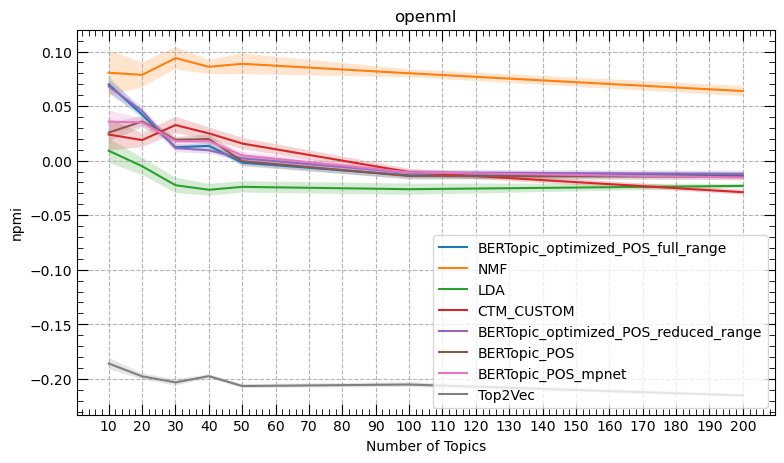

In [33]:
for dataset in results.get_keys()["basic"]:
    if dataset != "all":
        fig = results.plot_results(dataset, title=dataset, x="nr_topics", y="npmi", xlabel="Number of Topics",
                                    ylabel="npmi", figsize=(9, 5), confidence_interval=True)

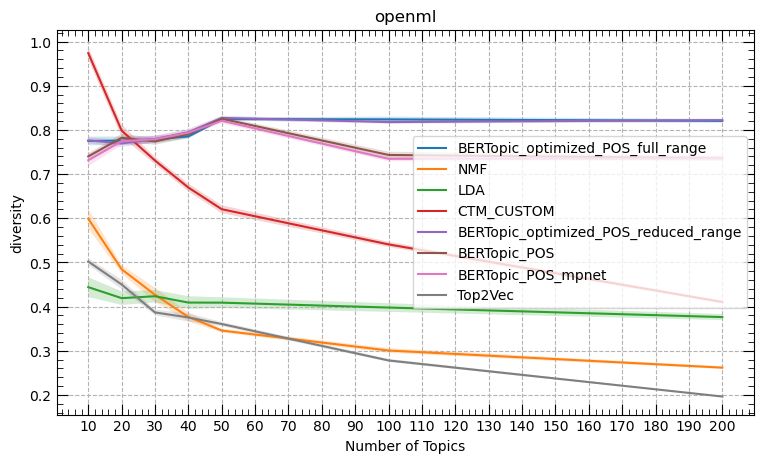

In [34]:
for dataset in results.get_keys()["basic"]:
    if dataset != "all":
        fig = results.plot_results(dataset, title=dataset, x="nr_topics", y="diversity", xlabel="Number of Topics",
                                    ylabel="diversity", figsize=(9, 5), confidence_interval=True)

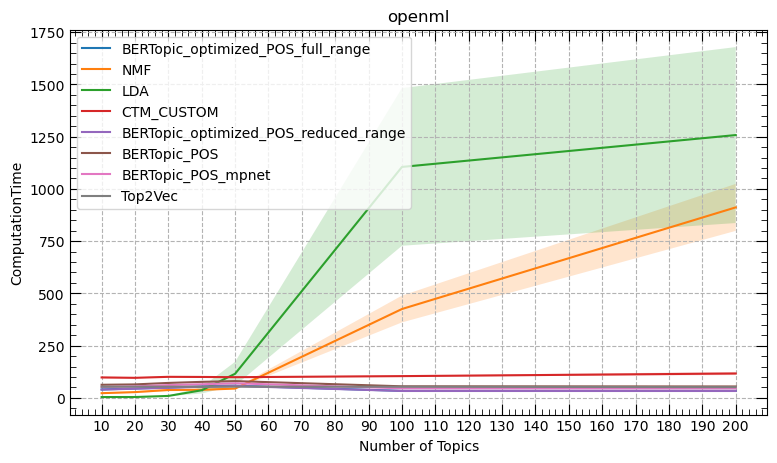

In [35]:
# Plot computation times with CTM
for dataset in results.get_keys()["basic"]:
    if dataset != "all":
        fig = results.plot_results(dataset, title=dataset, x="nr_topics", y="ComputationTime", xlabel="Number of Topics",
                                    ylabel="ComputationTime", figsize=(9, 5), confidence_interval=True)

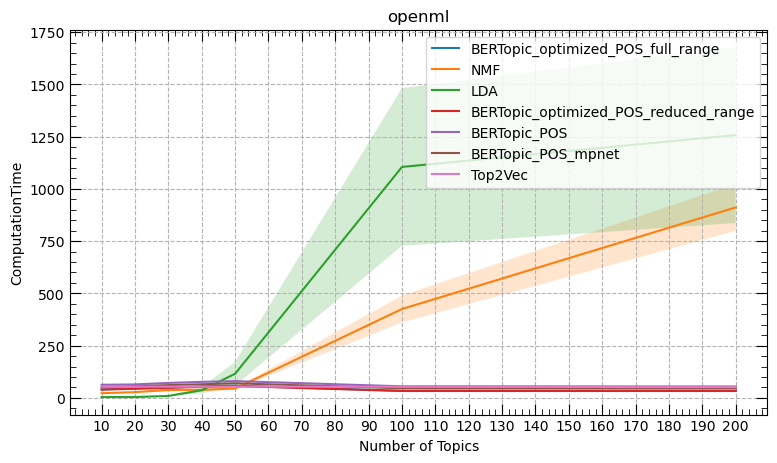

In [36]:
# Plot computation times without CTM
for dataset in results.get_keys()["basic"]:
    if dataset != "all":
        fig = results.plot_results(dataset, title=dataset, x="nr_topics", y="ComputationTime", xlabel="Number of Topics",
                                    ylabel="ComputationTime", figsize=(9, 5), confidence_interval=True, with_ctm=False)

In [37]:
results.visualize_table()